<h1 align="center">Spotify Data Analysis using Python - Project</h1>

<h3 align="right">By - **Ankit Katre**</h3>

## INTRODUCTION

Spotify is a Swedish audio streaming and media services provider founded in April 2006. It is the world's largest music streaming service provider and has over 381 million monthly active users, which also includes 172 million paid subscribers.

Here, We'll exploring and quantify data about music and drawing valuable insights.

Perform an exploratory data analysis (EDA) and data visualization project using data from Spotify using Python.

Data analysis exploring the relationship between the audio features of a song and how positive or negative its lyrics are, involving sentiment analysis.

Includes data collection script that scrapes audio feature data from the Spotify API, as well as lyrical data from the LyricWikiAPI

Spotify Data Analysis makes use of secondary data from Spotify. Learners will use data to identify patterns and relationships between different characteristics. The activity will support learners in developing their ability to review and interpret a dataset. The activity starts by encouraging learners to think of questions that the dataset might answer and thus develop their “Problem” skills. Once the dataset has been analysed learners will have the opportunity to reorganise and restructure data to help them answer their questions

## Importing Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Reading Data Set
tracks = pd.read_csv('tracks.csv')
genre = pd.read_csv('SpotifyFeatures.csv')

In [34]:
tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,231
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,150
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,211
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,202
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,199


In [4]:
genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Spotify Tracks Dataset Analysis

In [5]:
# checking null values
pd.isnull(tracks).sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92570 entries, 0 to 92569
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          92570 non-null  object 
 1   artists           92569 non-null  object 
 2   album_name        92569 non-null  object 
 3   track_name        92569 non-null  object 
 4   popularity        92570 non-null  int64  
 5   duration_ms       92570 non-null  int64  
 6   explicit          92570 non-null  bool   
 7   danceability      92570 non-null  float64
 8   energy            92570 non-null  float64
 9   key               92570 non-null  int64  
 10  loudness          92570 non-null  float64
 11  mode              92570 non-null  int64  
 12  speechiness       92570 non-null  float64
 13  acousticness      92570 non-null  float64
 14  instrumentalness  92570 non-null  float64
 15  liveness          92570 non-null  float64
 16  valence           92570 non-null  float6

### Descriptive statistics of Spotify tracks

In [7]:
tracks.describe().transpose() #or .T works same as transpose

,count,mean,std,min,25%,50%,75%,max
popularity,92570.0,33.025159,22.827166,0.00000,16.0000,33.000000,51.0000,100.000
duration_ms,92570.0,229323.169083,108939.267306,0.00000,175626.2500,214071.000000,262586.0000,5237295.000
danceability,92570.0,0.567215,0.173703,0.00000,0.4530,0.578000,0.6960,0.984
energy,92570.0,0.657247,0.248782,0.00002,0.4950,0.703000,0.8660,1.000
key,92570.0,5.321540,3.556791,0.00000,2.0000,5.000000,8.0000,11.000
loudness,92570.0,-7.991918,4.914430,-43.95700,-9.6700,-6.725000,-4.8050,4.532
mode,92570.0,0.637701,0.480667,0.00000,0.0000,1.000000,1.0000,1.000
speechiness,92570.0,0.087271,0.111169,0.00000,0.0361,0.049700,0.0872,0.965
acousticness,92570.0,0.291441,0.325776,0.00000,0.0123,0.136000,0.5470,0.996
instrumentalness,92570.0,0.153484,0.306916,0.00000,0.0000,0.000045,0.0466,0.999


### Top 10 most popular songs on Spotify

In [8]:
most = tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most[:10]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino


### Top 10 least popular songs on Spotify

In [9]:
least = tracks.sort_values('popularity', ascending = True).head(10)
least

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20889,2w6M3ukTNm1U8JVHjLSJVI,Becky Hill;Joel Corry,Pop Hits Now,HISTORY,0,176609,True,0.674,0.860,8,-3.318,1,0.0369,0.155000,0.000003,0.3590,0.771,122.975,4,dance
20933,3DKKyZu7Vu1L4p0qSSdBlr,Alesso;Katy Perry,Electro sounds,When I'm Gone,0,161266,False,0.685,0.886,0,-4.179,1,0.0340,0.028000,0.000000,0.4810,0.615,125.034,4,dance
20934,0Dh3d5wUSDiqxdajrrWX3t,Alesso;Katy Perry,Night Drive Autumn/Winter 2022/23,When I'm Gone,0,161266,False,0.685,0.886,0,-4.179,1,0.0340,0.028000,0.000000,0.4810,0.615,125.034,4,dance
20935,3UeMh2Mra28eDCSJjylBPc,Flo Rida;Sage The Gemini;Lookas,Energy Hip Hop,GDFR,0,190185,False,0.657,0.827,5,-4.034,1,0.0736,0.000698,0.005300,0.0650,0.690,145.887,4,dance
20936,7pX4qG17mw2Q8z6G9cbf0F,Flo Rida;Sage The Gemini;Lookas,The Hip Hop Collection,GDFR,0,190185,False,0.657,0.827,5,-4.034,1,0.0736,0.000698,0.005300,0.0650,0.690,145.887,4,dance
20937,7FgPBngMka3agGDUKqZWmx,Alesso;Katy Perry,Arbeitsmusik Herbst/Winter 2022/2023,When I'm Gone,0,161266,False,0.685,0.886,0,-4.179,1,0.0340,0.028000,0.000000,0.4810,0.615,125.034,4,dance
20888,0yciGxyHYjntJNmAj0ObzK,Ellie Goulding,Almorzando solo,Lights - Single Version,0,212706,False,0.681,0.802,8,-5.836,0,0.0347,0.027100,0.049600,0.1270,0.791,120.053,4,dance
20874,2PkBAXnfavpSySBRWaoxjf,Becky Hill;David Guetta,Arbeitsmusik Herbst/Winter 2022/2023,Remember,0,161386,False,0.626,0.864,8,-3.120,1,0.0378,0.068200,0.000000,0.0870,0.555,123.833,4,dance
20875,1hzhPRth1Dr4ZO1fr21G4g,Ellie Goulding,pov: it's 2020,Power,0,191786,False,0.538,0.642,10,-4.412,1,0.1270,0.104000,0.000000,0.1120,0.470,161.803,4,dance
20876,095guSCGTmugqLwBwlHZH7,Becky Hill,Coffee Chill,Losing,0,234323,False,0.402,0.913,1,-6.212,0,0.2660,0.000547,0.000003,0.0869,0.351,213.928,4,dance


### Check artist at 18th row of Spotify Tracks Dataset

In [10]:
tracks[['artists']].iloc[18]

,18
artists,Jason Mraz;Colbie Caillat


### Converting duration from millisecond to second on Spotify Tracks Dataset

In [36]:
tracks['duration'] = tracks['duration_ms'].apply(lambda x: round(x / 1000))
# tracks.drop('duration', inplace=True, axis=1)
tracks['duration'].head()

,duration
0,231
1,150
2,211
3,202
4,199


In [37]:
tracks.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,231
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,150
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,211
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,202
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,199


### Correlation Heatmap between Variable using Pearson correlation method

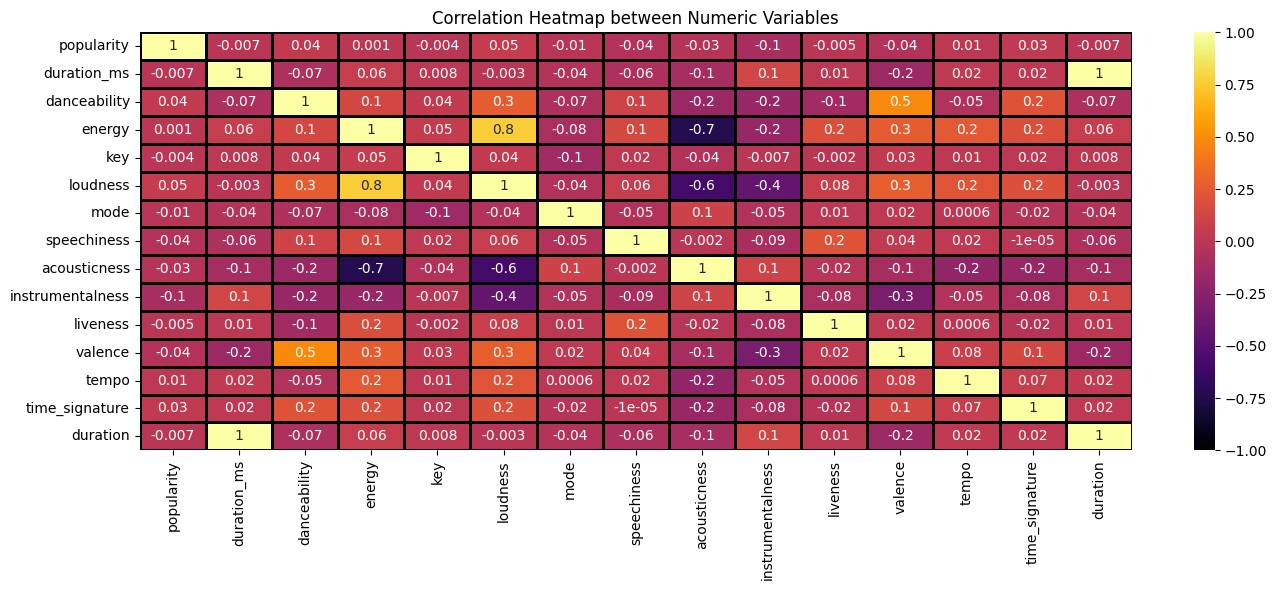

In [38]:
# Drop non-numeric columns automatically
tracks_numeric = tracks.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
cm = tracks_numeric.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 6))
map = sns.heatmap(cm, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0,
                  cmap='inferno', linewidths=1, linecolor='black')
map.set_title('Correlation Heatmap between Numeric Variables')
map.set_xticklabels(map.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Considering 0.4% of the total dataset to create Regression plots

In [39]:
sam = tracks.sample(int(0.004 * len(tracks)))
len(sam)

456

### Regression plot - Correlation between Loudness and Energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

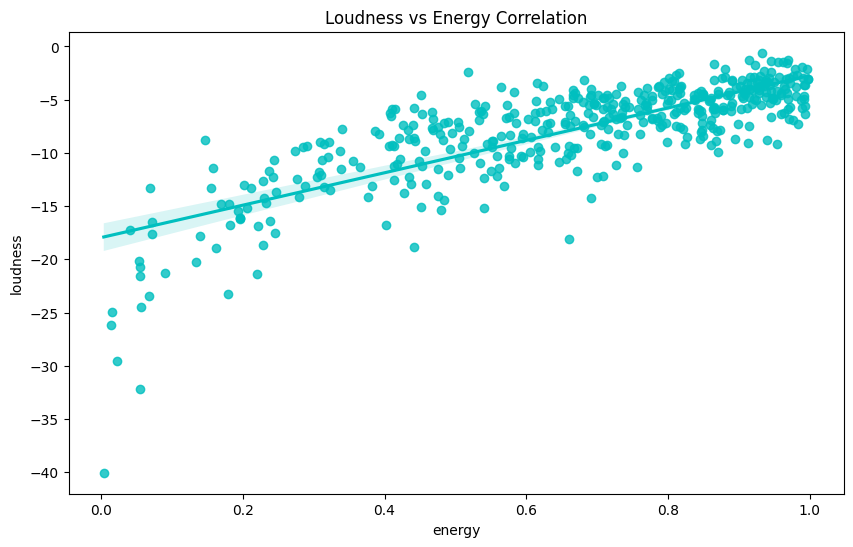

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')

### Regression plot - Correlation between Popularity and Acousticness

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

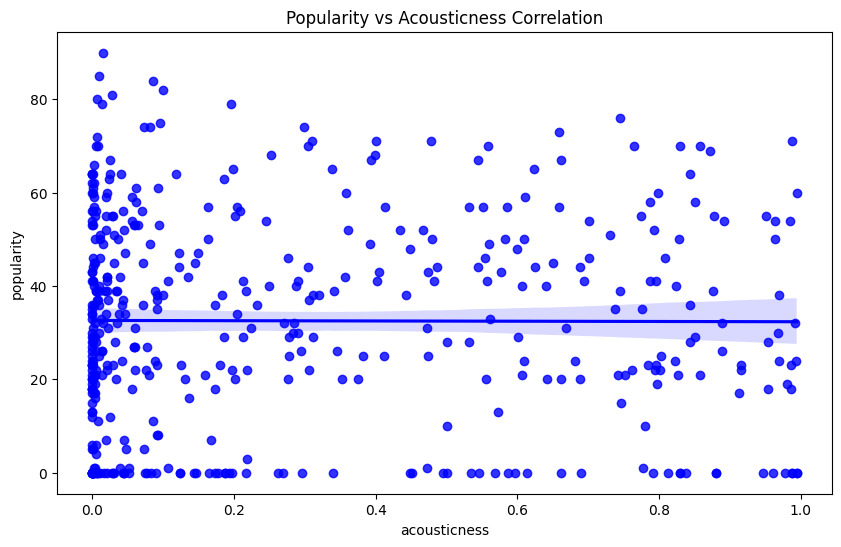

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='popularity', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

### Distibution plot -  Distribution of Valence (Happiness Level)

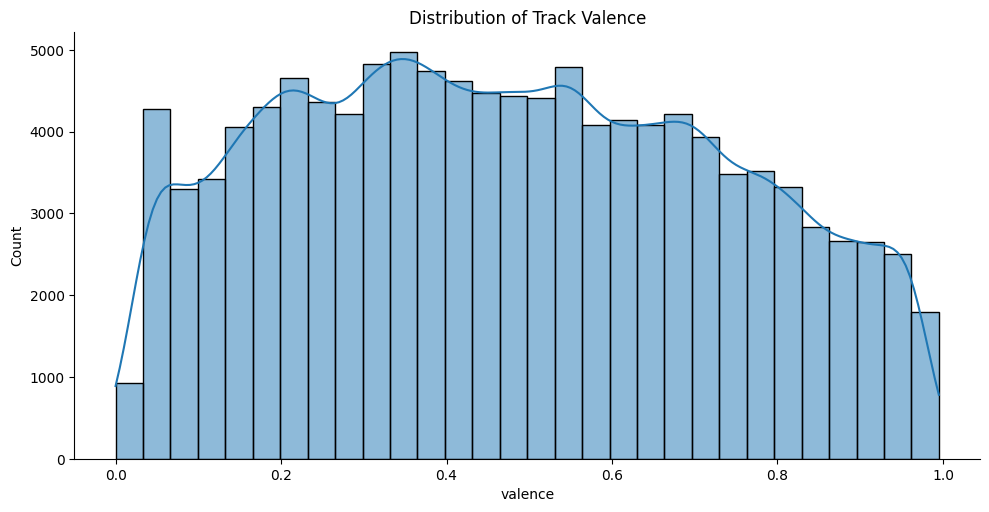

In [42]:
sns.displot(tracks['valence'], bins=30, aspect=2, height=5, kde=True).set(title='Distribution of Track Valence')

###How does duration correlate with popularity?


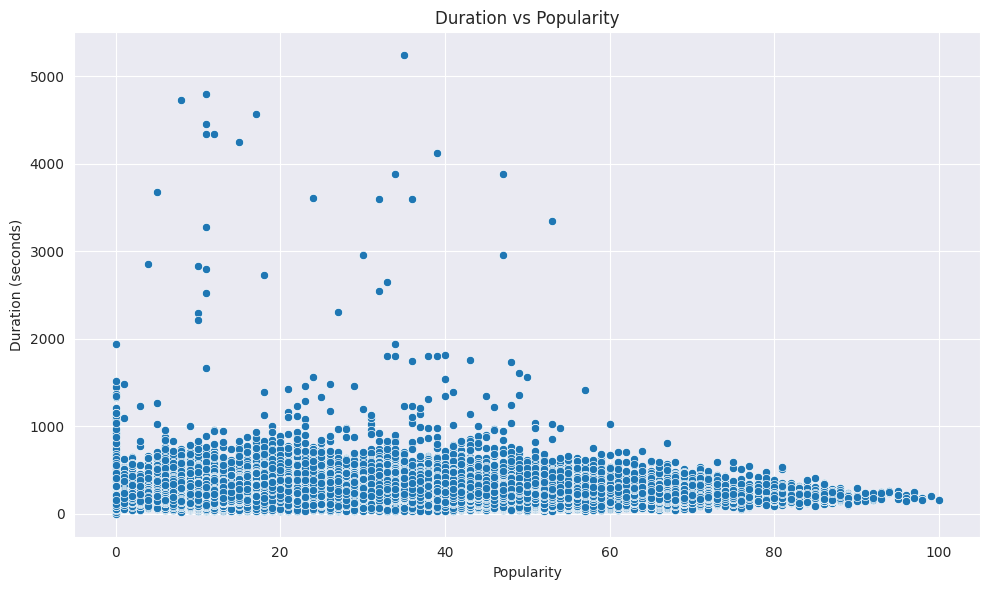

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tracks, x='popularity', y='duration')
plt.title('Duration vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()

## Spotify Features Dataset Analysis

### Duration of songs in different Genres

Text(0, 0.5, 'Genres')

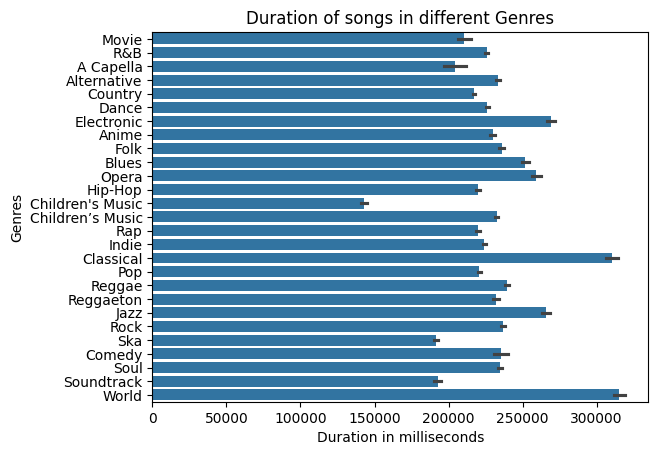

In [43]:
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=genre)
plt.xlabel('Duration in milliseconds')
plt.ylabel('Genres')

### Top 5 Genres by Popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

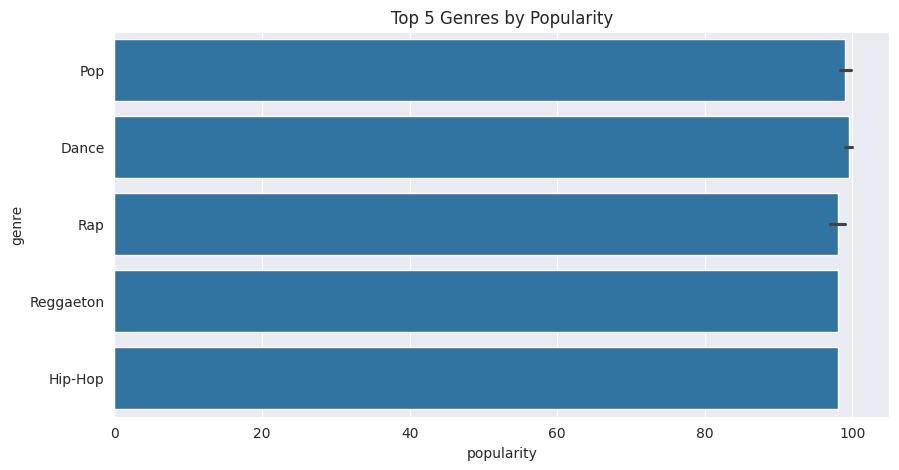

In [44]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity', data = popular).set(title='Top 5 Genres by Popularity')